# <center> **Disaster Tweets**


## <center> A text mining project to identify disaster events to improve response.

## 1. Business Problem Definition

Social media is a vital part of our lives and has even bigger impact in the younger generation. People post their feelings, activities, and actions, in their social media accounts such as twitter, even before they let their close ones know. There are many circumstances where people communicate an emergency messages or disaster events in social media using micro blogging services. Therefore, it is vital that the emergency responders and first line responders needs to monitor those distressing tweets and posts so that they are more aware of the situation and circumstances before it gets worse. While one part of disaster response is notifying emergency responders, the other part of it is to limit access of people in those areas. This can easily be done by establishing alert system in cellphones similar to AMBER alert and Blue alert based on Geo location code of the disaster location. <br> <br>
However, unfortunately, the greater challenge is that social media today is also a medium of spreading fake news; hence, the bigger challenge is to identify only real disasters events to alert first-responders and other citizens through mobile alert system. In regards to the audience or users of this problem, this could be the vital part of country's emergency response platform. Since everyone today has cellphone handy, introducing new type of disaster alert system similar to AMBER alert or Blue Alert would greatly support all citizens if the alerts are real, live, and not fake. Therefore, all the citizens, help seekers, and emergency responders are affected by this problem.
<br> <br>

Building a model, that classifies real and fake disaster tweets such as emergency calls, accidents, ablaze, etc. can have a greater social and economic impact. If people are notified of the disaster events in their cellphone similar to AMBER Alerts based on geo-location of the tweets, people in the surrounding area can be alert and take necessary precautions. For example, recently Hurricane Ida hit NJ in the least expected way. During this time, few roads were working file whereas others were blocked due to flood. If we had disaster response alert system that notified people that certain roads were closed by analyzing tweets of people getting stuck in flood, other people would have taken alternative path and would have reached destination safely. This also applies for emergency responders to better prepare for disasters and respond quickly potentially saving lives and communities. Therefore, this model by flagging the disaster tweets, it can limit people's acess to disaster region as well as provide information to emergency responders at the same time.
<br> <br>
Once we build a model that classifies real and fake disaster news, this model can be directly linked to national alert system such as AMBER alert or Blue alert OR to social media using API, urls, or tweet reports, with the cooperation of social media hosts such as Twitter. Once, we connect this model real time, it can respond to the distressing tweets that are flagged as real, as responding to fake tweets or fake emergency calls may prove to be extremely expensive for emergency responders. Considering the importance of this model and impact that it can have on people's lives, we will choose the model with higher accuracy and the model is deemed acceptable if it has an accuracy of over 80 percent.



## 2. Exploratory Data Analysis

### Dataset Explanation

For this project, we will be using dataset from Kaggle. The dataset is named as *Disaster Tweets*. It contains over 11,000 tweets associated with disaster keywords such as "crash", "quarintine", "bushfires", "ablaze", etc. that were collected on January, 2020. Some of the topics that people were tweeting were about Coronavirus, Fire in Australia, Volcano Eruption in Philippines, Plane Bombing, etc.


In [ ]:
#importing pandas
import pandas as pd

#uploading dataset
df = pd.read_csv("tweets.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


As we can see above, the dataset contains five columns. However, as the purpose of this project is to analyze and classify the tweets, we will be focusing mainly on tweet text which is "text" for our analysis. 

The "target" column indicates whether the tweet is fake or real. Since we only want to focus on real tweets, we would label 1 as real disaster tweets and 0 for fake tweets. In the dataset, it is already classified as the way we want in our model. 

### Data Preprocessing

In [ ]:
#previewing imported dataset
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
#dropping unrequired columns
df.drop(["id","keyword","location"],axis = 1, inplace = True)

#previewing dataframe after droping columns
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


Since the purpose of our model is to respond only to real disaster news, we would classify real tweets as 1 and fake tweets as 0. We verified the dataset and the target variable named as "target" in our dataset is already classified in the way we desired.

In [ ]:

#determining total records in our dataframe
df.shape

(11370, 2)

positive label proportion:  0.1859278803869833


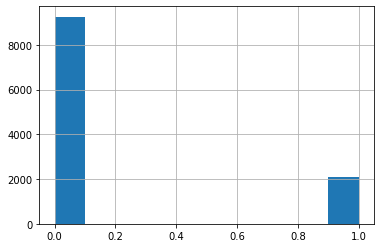

In [ ]:
#accessing label class distribution
df.target.hist()

print('positive label proportion: ', df.target.mean())

From above histogram, we can see that around 18% of the tweets in the dataset were real disaster related. There are just over 11,000 reviews for the product and approximately 2,100 of those are disaster related that concerns the emergency responders and society.

## 3. Model Creation

### Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Boosted Tree, and ANN

In [ ]:
#converting reviews into lower case
df.text = df.text.str.lower()

#checking dataframe
df.head()

,text,target
0,"communal violence in bhainsa, telangana. ""ston...",1
1,telangana: section 144 has been imposed in bha...,1
2,arsonist sets cars ablaze at dealership https:...,1
3,arsonist sets cars ablaze at dealership https:...,1
4,"""lord jesus, your love brings freedom and pard...",0


In [ ]:
#checking if we have any blanks in df as CountVectorizer does not support NaN
df.isna().sum()

text      0
target    0
dtype: int64

In [ ]:
#importing sklearn data partition package
from sklearn.model_selection import train_test_split

#partitioning dataset into training and testing set
X = df.text
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 121)

In [ ]:
#importing pipeline and classifiers
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Classifiers
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

#importing sklearn's model performance packages
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

In [ ]:
#List of models to be built
names = ['Multinomial Naive Bayes', 'Complement Naive Bayes','Logistic Regression', 'SVM', 'Decision Tree','Random Forest','Boosted Tree', 'ANN']

#defining corresponding list of classifiers in the list of models
classifiers = [MultinomialNB(),
               ComplementNB(),
               LogisticRegression(),
               SVC(probability = True),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10),
               AdaBoostClassifier(),
               MLPClassifier(alpha=1,max_iter=1000)
               ]

In [ ]:
#iterating through the list of models
#excluding english stopwords and developing TFDIF transformed feature representation using Pipeline

for name,clf in zip(names,classifiers):
  clf_pipe = Pipeline([
                       ('vect',CountVectorizer(stop_words = {'english'})),
                       ('tfidf',TfidfTransformer()),
                       (name,clf),
  ])

  #"clf_pipe" pipeline is using all the required models. Therefore, we can fit our training dataset in the pipeline to develop classification models

  #developing classification models
  clf_pipe.fit(X_train,y_train)

  #supplying test dataset to evaluate model performance
  pred = clf_pipe.predict(X_test)
  pred_prob = clf_pipe.predict_proba(X_test)[:,1]

  ##evaluating model performance

  #calculating other performance metrices
  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  #printing classification report and performance results
  print('\n\n', name, '\n\n')
  print(classification_report(y_test,pred))
  print('ROC AUC: ',auc(fpr,tpr))
  print('Precision/Recall AUC: ', auc(precision,recall))
  print('\n\n')



 Multinomial Naive Bayes 


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3063
           1       0.98      0.14      0.24       690

    accuracy                           0.84      3753
   macro avg       0.91      0.57      0.58      3753
weighted avg       0.86      0.84      0.79      3753

ROC AUC:  0.8538439154565715
Precision/Recall AUC:  0.4532495018477971





 Complement Naive Bayes 


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3063
           1       0.81      0.44      0.57       690

    accuracy                           0.88      3753
   macro avg       0.85      0.71      0.75      3753
weighted avg       0.87      0.88      0.86      3753

ROC AUC:  0.8538439154565715
Precision/Recall AUC:  0.49403898096447296





 Logistic Regression 


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3063
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 Boosted Tree 


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3063
           1       0.63      0.36      0.46       690

    accuracy                           0.84      3753
   macro avg       0.75      0.66      0.69      3753
weighted avg       0.83      0.84      0.83      3753

ROC AUC:  0.803185756126181
Precision/Recall AUC:  0.37184431756903125





 ANN 


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3063
           1       0.95      0.13      0.24       690

    accuracy                           0.84      3753
   macro avg       0.89      0.57      0.57      3753
weighted avg       0.86      0.84      0.79      3753

ROC AUC:  0.8730705900722509
Precision/Recall AUC:  0.43756455350360346





### LSTM Based Model with an Embedding Layer

In [ ]:
#importing dependencies

import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation
from keras.layers import Input, TextVectorization
from keras.callbacks import *
from keras.metrics import * 
from keras.backend import clear_session
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

import spacy

In [ ]:
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(X_train))

#converting text into integer sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#padding to prepare sequences of same length
X_train_seq = pad_sequences(X_train_seq, maxlen=100)
X_test_seq = pad_sequences(X_test_seq,maxlen=100)

In [ ]:
#detemining the size of vocabulary in the training dataset
size_of_vocabulary = len(tokenizer.word_index) + 1
print(size_of_vocabulary)

23709


In [ ]:
#defining the metric that needs to be calculated
METRICS = [
           TruePositives(name='tp'),
           FalsePositives(name='fp'),
           TrueNegatives(name='tn'),
           FalseNegatives(name='fn'),
           BinaryAccuracy(name='accuracy'),
           Precision(name='precision'),
           Recall(name='recall'),
           AUC(name='auc'),
           AUC(name='prc', curve='PR'),
]

In [ ]:
#defining the LSTM-based model

#clearing session to clear previous model data
clear_session()

#defining sequential model
model = Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,300,input_length=100,trainable=True))

#lstm layer
model.add(LSTM(128,return_sequences=True, dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = METRICS )

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model', monitor='val_loss', mode = 'min', save_best_only=True,save_weights_only=False, verbose=1)

#Printing summary of model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          7112700   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          219648    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,340,669
Trainable params: 7,340,669
Non-trainable params: 0
______________________________________________

In [ ]:
#fitting model to the dataframe
history = model.fit(np.array(X_train_seq),np.array(y_train),batch_size=128,epochs=10,
                    validation_data=(np.array(X_test_seq),np.array(y_test)),verbose=1, callbacks=[es,mc])

Epoch 1/10
59/60 [============================>.] - ETA: 0s - loss: 0.4969 - tp: 16.0000 - fp: 90.0000 - tn: 6049.0000 - fn: 1397.0000 - accuracy: 0.8031 - precision: 0.1509 - recall: 0.0113 - auc: 0.5294 - prc: 0.1968
Epoch 00001: val_loss improved from inf to 0.44426, saving model to best_model


INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


60/60 [==============================] - 21s 207ms/step - loss: 0.4964 - tp: 16.0000 - fp: 90.0000 - tn: 6103.0000 - fn: 1408.0000 - accuracy: 0.8033 - precision: 0.1509 - recall: 0.0112 - auc: 0.5312 - prc: 0.1974 - val_loss: 0.4443 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3063.0000 - val_fn: 690.0000 - val_accuracy: 0.8161 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8176 - val_prc: 0.5740
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.3143 - tp: 545.0000 - fp: 111.0000 - tn: 6082.0000 - fn: 879.0000 - accuracy: 0.8700 - precision: 0.8308 - recall: 0.3827 - auc: 0.8811 - prc: 0.6970
Epoch 00002: val_loss improved from 0.44426 to 0.29177, saving model to best_model


INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


60/60 [==============================] - 11s 178ms/step - loss: 0.3143 - tp: 545.0000 - fp: 111.0000 - tn: 6082.0000 - fn: 879.0000 - accuracy: 0.8700 - precision: 0.8308 - recall: 0.3827 - auc: 0.8811 - prc: 0.6970 - val_loss: 0.2918 - val_tp: 477.0000 - val_fp: 224.0000 - val_tn: 2839.0000 - val_fn: 213.0000 - val_accuracy: 0.8836 - val_precision: 0.6805 - val_recall: 0.6913 - val_auc: 0.9005 - val_prc: 0.7574
Epoch 3/10
59/60 [============================>.] - ETA: 0s - loss: 0.1332 - tp: 1212.0000 - fp: 144.0000 - tn: 5996.0000 - fn: 200.0000 - accuracy: 0.9544 - precision: 0.8938 - recall: 0.8584 - auc: 0.9773 - prc: 0.9344
Epoch 00003: val_loss did not improve from 0.29177
60/60 [==============================] - 3s 51ms/step - loss: 0.1334 - tp: 1222.0000 - fp: 147.0000 - tn: 6046.0000 - fn: 202.0000 - accuracy: 0.9542 - precision: 0.8926 - recall: 0.8581 - auc: 0.9773 - prc: 0.9344 - val_loss: 0.3129 - val_tp: 402.0000 - val_fp: 97.0000 - val_tn: 2966.0000 - val_fn: 288.0000 - 

In [ ]:
#loading the saved best model
from keras.models import load_model
model = load_model('best_model')

In [ ]:
#accessing model performance

model_results = model.evaluate(X_test_seq,y_test,batch_size=128,verbose=0)

for name, value in zip(model.metrics_names, model_results):
  print(name, ": ", value)

loss :  0.29177019000053406
tp :  477.0
fp :  224.0
tn :  2839.0
fn :  213.0
accuracy :  0.8835598230361938
precision :  0.6804565191268921
recall :  0.6913043260574341
auc :  0.9005115032196045
prc :  0.7574114203453064


### LSTM-based model using GloVe pre-trained embedding from SpaCy

In [ ]:
#downloading the large model form Spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.5 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=057d1f2f99922f8979128555b4493a4f33aa2eca89f981c35852073c806212b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-qnnccnr0/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
#importing language model, instantiating spaCy pipeling object and vectorizer
import en_core_web_lg

nlp = en_core_web_lg.load()
Vectorizer = TextVectorization()

In [ ]:
#Adapting vectorizer and loading embedding layer parameters
Vectorizer.adapt(X_train.to_numpy())
vocab = Vectorizer.get_vocabulary()

#generating embedding matrix
num_tokens = len(vocab)
embedding_dim = len(nlp('The').vector)
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab):
  embedding_matrix[i] = nlp(str(word)).vector

#Loading the embedding matrix as the weights matrix fot the embedding layer and setting trainable to False
Embedding_layer=Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False)

In [ ]:

#defining model with custom vectorizer and pre-defined embedding layer using spaCy

#clearing session to clear previous model data
clear_session()

model2 = Sequential()
model2.add(Input(shape=(1,),dtype=tf.string))

model2.add(Vectorizer)
model2.add(Embedding_layer)

#lstm layer
model2.add(LSTM(128,return_sequences=True, dropout=0.2))

#Global Maxpooling
model2.add(GlobalMaxPooling1D())

#Dense Layer
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))


#Add loss function, metrics, optimizer
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics = METRICS )

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model2', monitor='val_loss', mode = 'min', save_best_only=True,save_weights_only=False, verbose=1)

#Printing summary of model
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 300)         7278900   
                                                                 
 lstm (LSTM)                 (None, None, 128)         219648    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fitting model to the dataframe
history2 = model2.fit(X_train,y_train,batch_size=128,epochs=10,
                    validation_data=(X_test,y_test),verbose=1, callbacks=[es,mc])

Epoch 1/10
58/60 [============================>.] - ETA: 0s - loss: 0.4284 - tp: 731.0000 - fp: 505.0000 - tn: 8595.0000 - fn: 1346.0000 - accuracy: 0.8344 - precision: 0.5914 - recall: 0.3519 - auc: 0.7861 - prc: 0.5309
Epoch 00001: val_loss improved from inf to 0.32373, saving model to best_model2


INFO:tensorflow:Assets written to: best_model2/assets


INFO:tensorflow:Assets written to: best_model2/assets


60/60 [==============================] - 53s 804ms/step - loss: 0.4260 - tp: 751.0000 - fp: 517.0000 - tn: 8739.0000 - fn: 1363.0000 - accuracy: 0.8347 - precision: 0.5923 - recall: 0.3553 - auc: 0.7876 - prc: 0.5324 - val_loss: 0.3237 - val_tp: 421.0000 - val_fp: 245.0000 - val_tn: 2818.0000 - val_fn: 269.0000 - val_accuracy: 0.8630 - val_precision: 0.6321 - val_recall: 0.6101 - val_auc: 0.8725 - val_prc: 0.6760
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.3015 - tp: 852.0000 - fp: 359.0000 - tn: 5834.0000 - fn: 572.0000 - accuracy: 0.8778 - precision: 0.7036 - recall: 0.5983 - auc: 0.8887 - prc: 0.7017
Epoch 00002: val_loss improved from 0.32373 to 0.30675, saving model to best_model2


INFO:tensorflow:Assets written to: best_model2/assets


INFO:tensorflow:Assets written to: best_model2/assets


60/60 [==============================] - 46s 777ms/step - loss: 0.3015 - tp: 852.0000 - fp: 359.0000 - tn: 5834.0000 - fn: 572.0000 - accuracy: 0.8778 - precision: 0.7036 - recall: 0.5983 - auc: 0.8887 - prc: 0.7017 - val_loss: 0.3068 - val_tp: 478.0000 - val_fp: 266.0000 - val_tn: 2797.0000 - val_fn: 212.0000 - val_accuracy: 0.8726 - val_precision: 0.6425 - val_recall: 0.6928 - val_auc: 0.8967 - val_prc: 0.7208
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.2703 - tp: 896.0000 - fp: 292.0000 - tn: 5901.0000 - fn: 528.0000 - accuracy: 0.8923 - precision: 0.7542 - recall: 0.6292 - auc: 0.9110 - prc: 0.7561
Epoch 00003: val_loss improved from 0.30675 to 0.27960, saving model to best_model2


INFO:tensorflow:Assets written to: best_model2/assets


INFO:tensorflow:Assets written to: best_model2/assets


60/60 [==============================] - 46s 778ms/step - loss: 0.2703 - tp: 896.0000 - fp: 292.0000 - tn: 5901.0000 - fn: 528.0000 - accuracy: 0.8923 - precision: 0.7542 - recall: 0.6292 - auc: 0.9110 - prc: 0.7561 - val_loss: 0.2796 - val_tp: 420.0000 - val_fp: 156.0000 - val_tn: 2907.0000 - val_fn: 270.0000 - val_accuracy: 0.8865 - val_precision: 0.7292 - val_recall: 0.6087 - val_auc: 0.9064 - val_prc: 0.7440
Epoch 4/10
59/60 [============================>.] - ETA: 0s - loss: 0.2482 - tp: 929.0000 - fp: 257.0000 - tn: 5876.0000 - fn: 490.0000 - accuracy: 0.9011 - precision: 0.7833 - recall: 0.6547 - auc: 0.9268 - prc: 0.7980
Epoch 00004: val_loss did not improve from 0.27960
60/60 [==============================] - 2s 31ms/step - loss: 0.2473 - tp: 933.0000 - fp: 259.0000 - tn: 5934.0000 - fn: 491.0000 - accuracy: 0.9015 - precision: 0.7827 - recall: 0.6552 - auc: 0.9269 - prc: 0.7976 - val_loss: 0.2987 - val_tp: 484.0000 - val_fp: 265.0000 - val_tn: 2798.0000 - val_fn: 206.0000 - v

INFO:tensorflow:Assets written to: best_model2/assets


INFO:tensorflow:Assets written to: best_model2/assets


60/60 [==============================] - 52s 877ms/step - loss: 0.2233 - tp: 977.0000 - fp: 208.0000 - tn: 5985.0000 - fn: 447.0000 - accuracy: 0.9140 - precision: 0.8245 - recall: 0.6861 - auc: 0.9394 - prc: 0.8373 - val_loss: 0.2743 - val_tp: 444.0000 - val_fp: 188.0000 - val_tn: 2875.0000 - val_fn: 246.0000 - val_accuracy: 0.8844 - val_precision: 0.7025 - val_recall: 0.6435 - val_auc: 0.9124 - val_prc: 0.7591
Epoch 6/10
60/60 [==============================] - ETA: 0s - loss: 0.2027 - tp: 1021.0000 - fp: 184.0000 - tn: 6009.0000 - fn: 403.0000 - accuracy: 0.9229 - precision: 0.8473 - recall: 0.7170 - auc: 0.9499 - prc: 0.8654
Epoch 00006: val_loss improved from 0.27434 to 0.26946, saving model to best_model2


INFO:tensorflow:Assets written to: best_model2/assets


INFO:tensorflow:Assets written to: best_model2/assets


60/60 [==============================] - 60s 1s/step - loss: 0.2027 - tp: 1021.0000 - fp: 184.0000 - tn: 6009.0000 - fn: 403.0000 - accuracy: 0.9229 - precision: 0.8473 - recall: 0.7170 - auc: 0.9499 - prc: 0.8654 - val_loss: 0.2695 - val_tp: 489.0000 - val_fp: 199.0000 - val_tn: 2864.0000 - val_fn: 201.0000 - val_accuracy: 0.8934 - val_precision: 0.7108 - val_recall: 0.7087 - val_auc: 0.9198 - val_prc: 0.7795
Epoch 7/10
60/60 [==============================] - ETA: 0s - loss: 0.1807 - tp: 1068.0000 - fp: 150.0000 - tn: 6043.0000 - fn: 356.0000 - accuracy: 0.9336 - precision: 0.8768 - recall: 0.7500 - auc: 0.9599 - prc: 0.8938
Epoch 00007: val_loss did not improve from 0.26946
60/60 [==============================] - 2s 31ms/step - loss: 0.1807 - tp: 1068.0000 - fp: 150.0000 - tn: 6043.0000 - fn: 356.0000 - accuracy: 0.9336 - precision: 0.8768 - recall: 0.7500 - auc: 0.9599 - prc: 0.8938 - val_loss: 0.3015 - val_tp: 493.0000 - val_fp: 265.0000 - val_tn: 2798.0000 - val_fn: 197.0000 - v

INFO:tensorflow:Assets written to: best_model2/assets


INFO:tensorflow:Assets written to: best_model2/assets


60/60 [==============================] - 45s 761ms/step - loss: 0.1611 - tp: 1120.0000 - fp: 142.0000 - tn: 6051.0000 - fn: 304.0000 - accuracy: 0.9414 - precision: 0.8875 - recall: 0.7865 - auc: 0.9677 - prc: 0.9136 - val_loss: 0.2568 - val_tp: 467.0000 - val_fp: 149.0000 - val_tn: 2914.0000 - val_fn: 223.0000 - val_accuracy: 0.9009 - val_precision: 0.7581 - val_recall: 0.6768 - val_auc: 0.9202 - val_prc: 0.7832
Epoch 9/10
59/60 [============================>.] - ETA: 0s - loss: 0.1315 - tp: 1155.0000 - fp: 101.0000 - tn: 6038.0000 - fn: 258.0000 - accuracy: 0.9525 - precision: 0.9196 - recall: 0.8174 - auc: 0.9794 - prc: 0.9417
Epoch 00009: val_loss did not improve from 0.25678
60/60 [==============================] - 2s 32ms/step - loss: 0.1315 - tp: 1165.0000 - fp: 103.0000 - tn: 6090.0000 - fn: 259.0000 - accuracy: 0.9525 - precision: 0.9188 - recall: 0.8181 - auc: 0.9795 - prc: 0.9416 - val_loss: 0.3053 - val_tp: 538.0000 - val_fp: 286.0000 - val_tn: 2777.0000 - val_fn: 152.0000 

In [ ]:
#accessing model performace
model2_results = model2.evaluate(X_test, y_test, batch_size = 128, verbose = 0)

for name, value in zip(model2.metrics_names, model2_results):
  print(name, ": ", value)

loss :  0.305347204208374
tp :  539.0
fp :  272.0
tn :  2791.0
fn :  151.0
accuracy :  0.8872901797294617
precision :  0.6646115779876709
recall :  0.7811594009399414
auc :  0.9255049824714661
prc :  0.7879942655563354


### BERT Transformer-based Model

In [ ]:
#installing prerequisites

# A dependency of the preprocessing for BERT inputs
!pip install -q -U tensorflow-text

# AdamW optimizer 
!pip install -q tf-models-official


     |████████████████████████████████| 4.9 MB 5.6 MB/s 
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 34.4 MB/s 
     |████████████████████████████████| 99 kB 7.7 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 213 kB 43.3 MB/s 
     |████████████████████████████████| 1.2 MB 32.7 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 352 kB 41.5 MB/s 
     |████████████████████████████████| 47.6 MB 2.8 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 


In [ ]:
# importing dependencies

import tensorflow as tf
import tensorflow_hub as hub # pre-trained models
import tensorflow_text as text # text pre-processing functions
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt


In [ ]:
#select small_bert model
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
#clearing session before building the model
from keras.backend import clear_session
clear_session()

In [ ]:
#defining model as function
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(128,activation='relu')(net)
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
#instantiating the model
classifier_model = build_classifier_model()

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

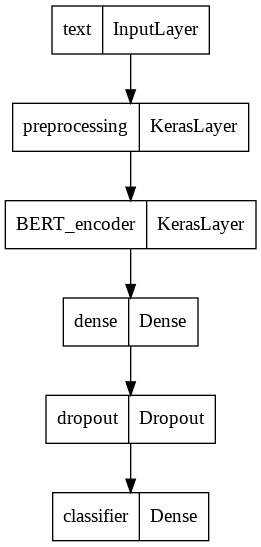

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
#loss function
loss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
#importing keras metrics
from keras.metrics import *

#defining the metric that needs to be calculated
METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
epochs = 5
steps_per_epoch = 100
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
#compining model with loss function, metrics, optimizer

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=METRICS)

In [ ]:
#training the model
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=X_train.values,y=y_train,
                               validation_data=(X_test.values,y_test),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
239/239 [==============================] - 2125s 9s/step - loss: 0.4122 - accuracy: 0.8081 - precision: 0.4264 - recall: 0.0772 - auc: 0.7835 - prc: 0.4112 - val_loss: 0.3687 - val_accuracy: 0.8188 - val_precision: 0.8571 - val_recall: 0.0174 - val_auc: 0.8532 - val_prc: 0.6050
Epoch 2/5
239/239 [==============================] - 2168s 9s/step - loss: 0.3866 - accuracy: 0.8226 - precision: 0.7417 - recall: 0.0787 - auc: 0.8189 - prc: 0.5343 - val_loss: 0.3687 - val_accuracy: 0.8188 - val_precision: 0.8571 - val_recall: 0.0174 - val_auc: 0.8532 - val_prc: 0.6050
Epoch 3/5
239/239 [==============================] - 2085s 9s/step - loss: 0.3866 - accuracy: 0.8213 - precision: 0.7442 - recall: 0.0674 - auc: 0.8204 - prc: 0.5279 - val_loss: 0.3687 - val_accuracy: 0.8188 - val_precision: 0.8571 - val_recall: 0.0174 - val_auc: 0.8532 - val_prc: 0.6050
Epoch 4/5
239/239 [======================

In [ ]:
#accessing model performance

model_results = classifier_model.evaluate(X_test.values,y_test,batch_size=128,verbose=0)

for name, value in zip(classifier_model.metrics_names, model_results):
  print(name, ": ", value)

loss :  0.3686690330505371
accuracy :  0.8188115954399109
precision :  0.8571428656578064
recall :  0.017391303554177284
auc :  0.8531883955001831
prc :  0.60496586561203


From above classification reports and metrices, we can see precision, recall, and F1- score for class 1 and class 0 and accuracy, auc, and pr auc score for the respective models . Since we are doing sentiment analysis of tweets, we would most likely want to focus on real disaster tweets, which in our case is classified as 1. However, we also want to make sure that we always send real disaster alerts i.e. also for class 0. Therefore, as explained in the introductory part of the model, we will focus on the model that has higher accuracy.  <br><br>
Among all the above models above, **Support Vector Machine (SVM)** has the highest accuracy and auc score. Therefore, we will be using SVM model for our project as it best fits the purpose of our project. SVM model has accuracy of 0.89 and ROC AUC score of 0.90 which is really good and explains that the model was able to classify the disaster tweets very well. Logistic Regression model has second best accuracy score but does poorly in precision, recall, and PR AUC scores. The LSTM models are also excellent and has higher accuracy than rest of other models. <br><br>For class 1, the recall score is 0.46 which states that the model correctly predicted 46% of all negative reviews as actually negative. Similarly, the precision of 0.90 states that the model classified negative reviews correctly 90% of times. Our precision of 0.90 is excellent.F1-score is the weighted average of precision and recall. We have F1-score of 0.61 and PR AUC score is 0.54 which states that we need to optimize threshold value to improve model performace. For class 0, we have precision of 0.89, recall of 0.99, and f1-score of 0.94 which is excellent and explains the model's ability to pick up fake disaster tweets. <br><br> **In conclusion, Support Vector Machine (SVM) is the best performing model.**

## 4. Model Prediction Using Synthetic Records (GPT-2)

In [ ]:
#installing prerequisites
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.6 MB/s 
     |████████████████████████████████| 3.3 MB 35.4 MB/s 
     |████████████████████████████████| 61 kB 451 kB/s 
     |████████████████████████████████| 895 kB 43.2 MB/s 


In [ ]:
#initiating a text generator
from transformers import pipeline, set_seed

set_seed(101)
generator = pipeline('text-generation', model='gpt2-large')

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:01<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
#generating synthetic records
input_txt = 'car crash'
generated_txt = generator(input_txt,max_length = 30, num_return_sequences=5)
print(generated_txt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'car crash; the driver, identified by the police as "James Michael Miller," 23, died in the crash at 11:30 a.m.'}, {'generated_text': 'car crash near the city.\n\nIn the fall after the shooting, he told the woman and her two children that if they ever had a similar'}, {'generated_text': "car crash outside a bar in Sydney: 'The bus came careering down the street so fast I thought it would go into the water'\n\n"}, {'generated_text': 'car crash involving the crash-prone Pontiac Grand Am, a vehicle that will remain in the back of the parking lot for 20 years.\n\n'}, {'generated_text': 'car crash into the rear of the other car. Both were pronounced dead at the scene. Police say the driver escaped with minor injuries.'}]


In [ ]:
#taking only values from generated_txt and appending them to new list
new_testing_list = []
index =0
for index in range(0,len(generated_txt)):
  new_testing_list.append(' '.join(list(generated_txt[index].values())).lower())
  index = index + 1

new_testing_list

['car crash; the driver, identified by the police as "james michael miller," 23, died in the crash at 11:30 a.m.',
 'car crash near the city.\n\nin the fall after the shooting, he told the woman and her two children that if they ever had a similar',
 "car crash outside a bar in sydney: 'the bus came careering down the street so fast i thought it would go into the water'\n\n",
 'car crash involving the crash-prone pontiac grand am, a vehicle that will remain in the back of the parking lot for 20 years.\n\n',
 'car crash into the rear of the other car. both were pronounced dead at the scene. police say the driver escaped with minor injuries.']

In [ ]:
#Accessing model predicting using above synthetic records list using best model
clf_pipe_syn_pred = Pipeline([
                       ('vect',CountVectorizer(stop_words = {'english'})),
                       ('tfidf',TfidfTransformer()),
                       ('Support Vector Machine',SVC(probability=True)),
])


#fitting training dataset into new pipeline
clf_pipe_syn_pred.fit(X_train,y_train)

#supplying synthetic records to evaluate model performance
syn_pred = clf_pipe_syn_pred.predict(new_testing_list)

In [ ]:
#printing synthetic records prediction performance
print(syn_pred)

[1 0 0 0 1]


We can see that our model classified the first and the last record as disaster tweet ;and, second, third, and fourth record was not classified as a disaster tweet. If we look at the records, it looks like all of them were relating to car crash but the first and the fourth record looks more like the news than an emergency tweet since it states after-the-fact details. <br><br>
This does display some the limitation of the model to use in production. We can see that if there are some after-the-fact news details then our model may still classify it as an emergency tweet and send out alerts to its users, acting more like a news channel rather than emergency notifier platform. 

## 5. Ethical Implications of Productizing the Model 

There are various ethical implications when we productize the AI models. This model also has some ethical implications. This model is dependent of twitter tweets. While we can see above that there are some limitations to this model, all the alters that are flagged by model as disaster tweets may not always be true. The model may some tweets that are not disaster related as disaster and may send out alerts to  the users. This may make model less ideal and some poeple may not take necessary actions during real disaster events things they are fake alerts. For example, some people may tweet long time after the disaster occured but if the model picks up as false positive, it would send wrong alerts to its users. <br><br>
As the analyzes the social media tweets/post from people, there may always be privacy issues. Some people may not intend to share that information to all users, specially when they are false positives. However, the model will always analyze user's posts and sentiments and may upbring the concerns of their posts and privacy issues. <br> <br>
There may also be some unintended ethical issues of the model being productized. As we are all aware, not all people have same good motive of helping other. This may bring some unintended issues as some people may take advantage of disasters happening and may work for their own personal gain rather than helping people in need.<br><br>
Apart everything, instantenous alerts though posts may create panic and chaos among people and it may lead to even severe consequences physically, mentally, and financially. For example, getting alert of shooting in a nearby location may severly impact people's movement in the surrounding area, naking the situation even worse. While there are all these ethical challenges, we should weight all risk before productizing the model.